In [628]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [630]:
# Read the CSV file into a DataFrame
df = pd.read_csv('diabetes_data new.csv')

# Display the first few rows of the DataFrame (optional)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64020 entries, 0 to 64019
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   64020 non-null  int64
 1   Sex                   64020 non-null  int64
 2   HighChol              64020 non-null  int64
 3   CholCheck             64020 non-null  int64
 4   BMI                   64020 non-null  int64
 5   Smoker                64020 non-null  int64
 6   HeartDiseaseorAttack  64020 non-null  int64
 7   PhysActivity          64020 non-null  int64
 8   Fruits                64020 non-null  int64
 9   Veggies               64020 non-null  int64
 10  HvyAlcoholConsump     64020 non-null  int64
 11  GenHlth               64020 non-null  int64
 12  MentHlth              64020 non-null  int64
 13  PhysHlth              64020 non-null  int64
 14  DiffWalk              64020 non-null  int64
 15  Stroke                64020 non-null  int64
 16  High

In [634]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [636]:
# Count the number of unique values in each column
unique_counts = df.nunique()

print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64


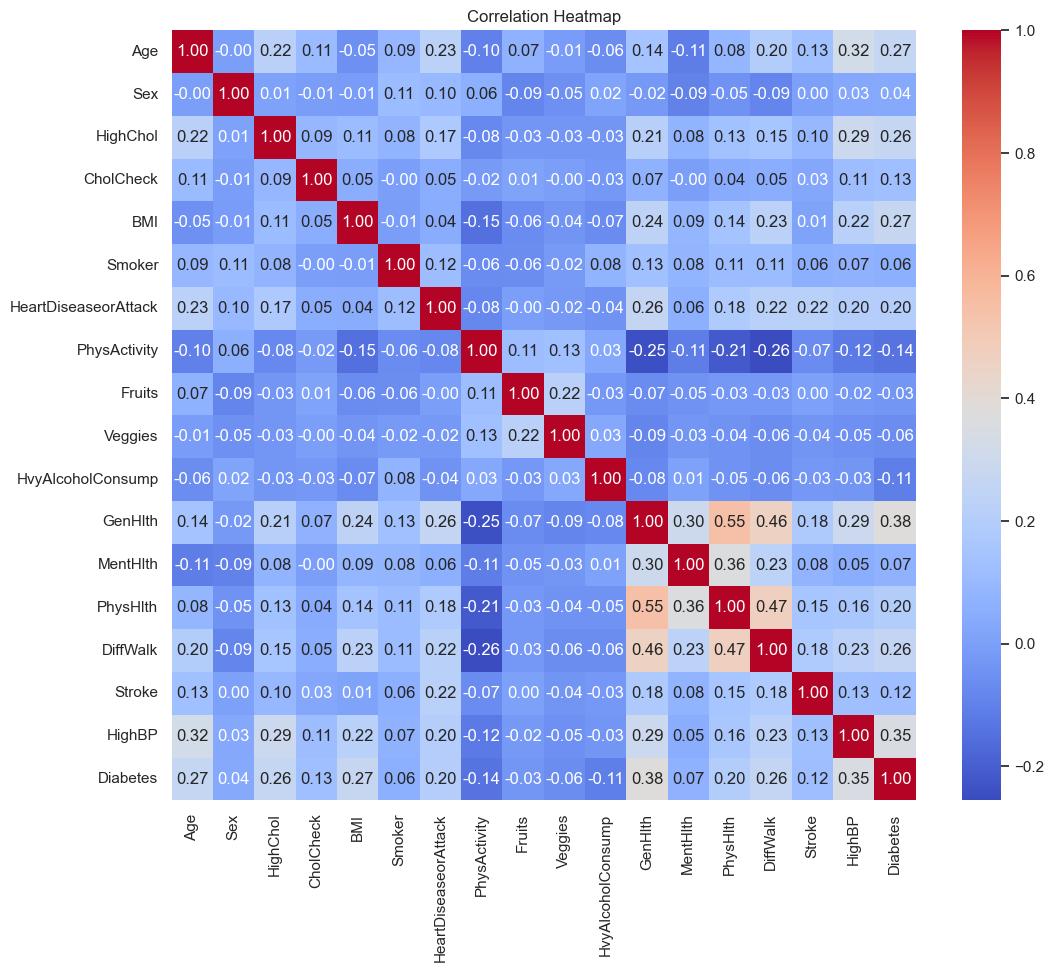

In [638]:
#Step 2: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Fatima\AppData\Local\Temp\ipykernel_1964\2120012672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diabetes", data=df, palette="pastel")  # Corrected parameter name: 'data=df'


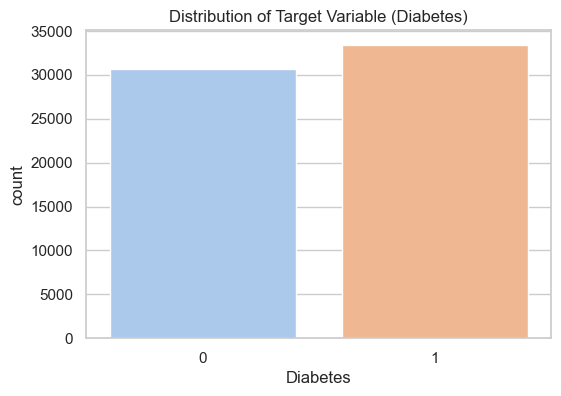

In [640]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Diabetes", data=df, palette="pastel")  # Corrected parameter name: 'data=df'
plt.title("Distribution of Target Variable (Diabetes)")
plt.show()

In [642]:
print("Original dataset class distribution:")
print(df["Diabetes"].value_counts())

Original dataset class distribution:
Diabetes
1    33398
0    30622
Name: count, dtype: int64


In [644]:
# Check class distribution of the target variable
class_distribution = df['Diabetes'].value_counts(normalize=True) * 100

# Display the class distribution in percentages
class_distribution

Diabetes
1    52.168072
0    47.831928
Name: proportion, dtype: float64

In [646]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000
mean,8.607420,0.455983,0.539550,0.973211,30.178554,0.490706,0.159950,0.678366,0.590862,0.771587,0.046345,2.921103,4.130537,6.385020,0.277007,0.068510,0.581756,0.521681
std,2.860717,0.498063,0.498437,0.161466,7.287730,0.499918,0.366563,0.467107,0.491679,0.419813,0.210233,1.107991,8.466301,10.368493,0.447524,0.252621,0.493275,0.499534
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


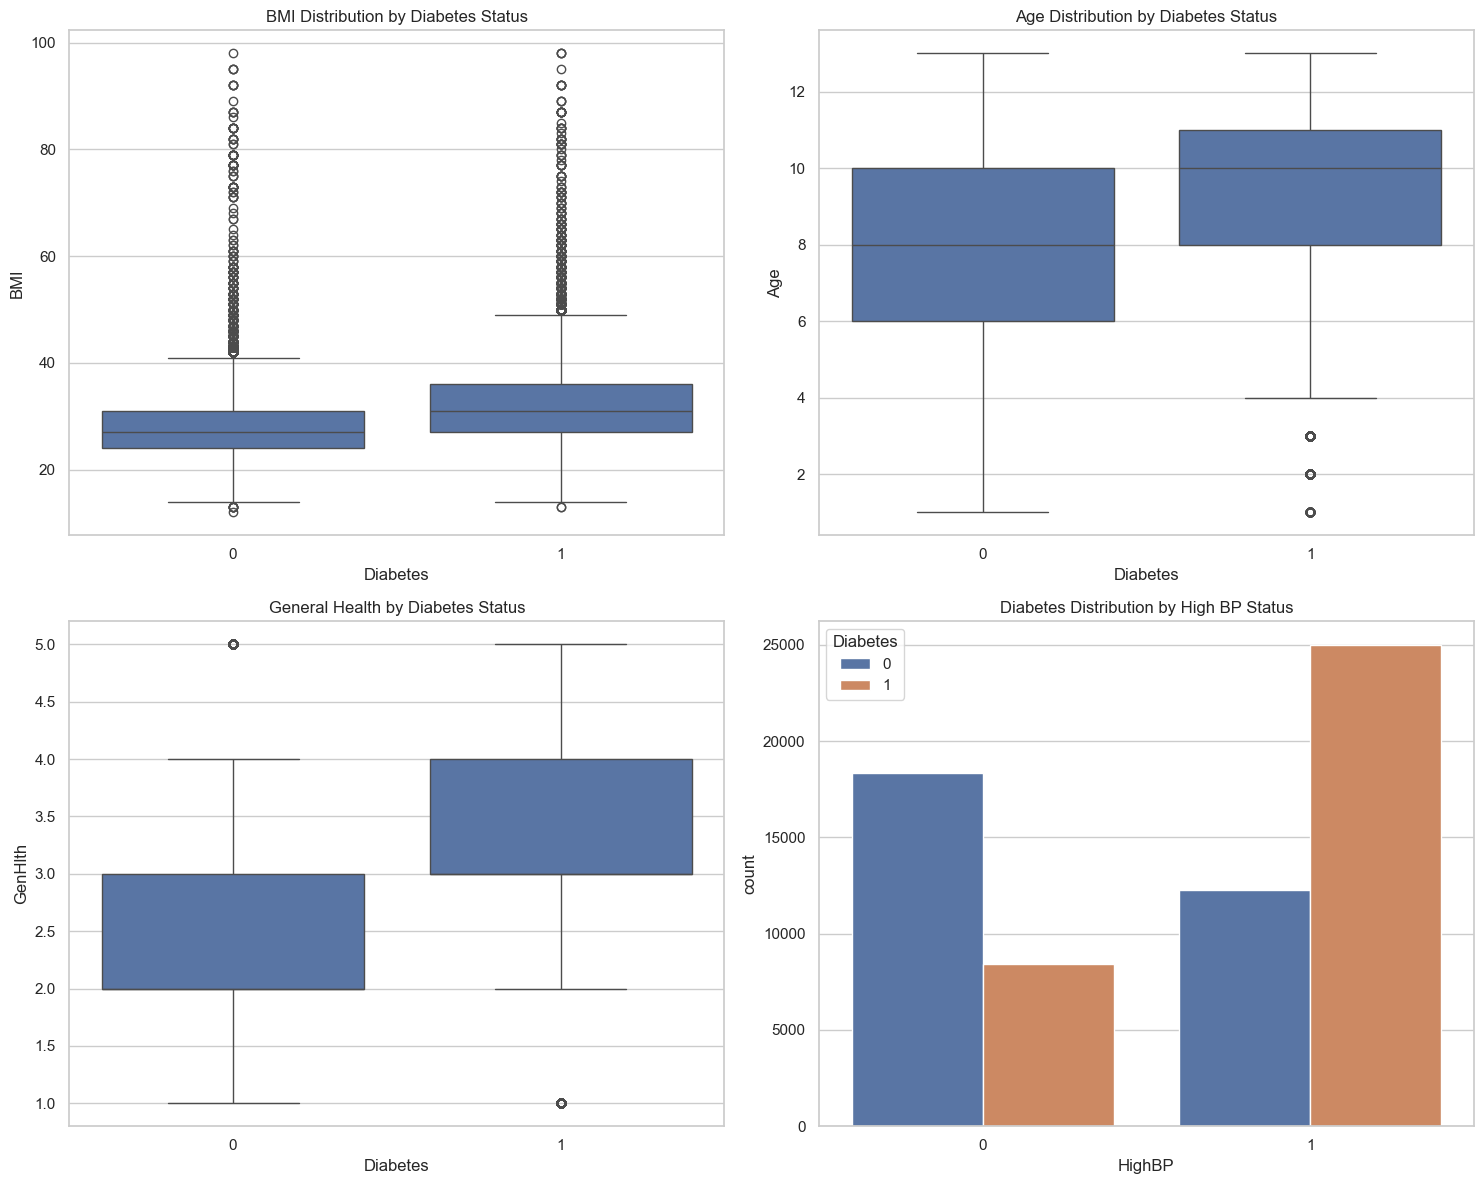


Key Data Insights:
Total samples: 64020
Diabetes cases: 33398
Non-diabetes cases: 30622

Top 5 Correlations with Diabetes:
Diabetes    1.000000
GenHlth     0.379334
HighBP      0.351481
BMI         0.272951
Age         0.268049
Name: Diabetes, dtype: float64


In [648]:
import matplotlib.pyplot as plt
import seaborn as sns

# Multiple Feature Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: BMI Distribution by Diabetes Status
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=axes[0, 0])
axes[0, 0].set_title('BMI Distribution by Diabetes Status')

# Plot 2: Age Distribution by Diabetes Status
sns.boxplot(x='Diabetes', y='Age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Diabetes Status')

# Plot 3: General Health by Diabetes Status
sns.boxplot(x='Diabetes', y='GenHlth', data=df, ax=axes[1, 0])
axes[1, 0].set_title('General Health by Diabetes Status')

# Plot 4: Diabetes Distribution by High BP Status
sns.countplot(x='HighBP', hue='Diabetes', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Diabetes Distribution by High BP Status')

# Adjust layout
plt.tight_layout()
plt.show()

# Print insights
print("\nKey Data Insights:")
print(f"Total samples: {len(df)}")
print(f"Diabetes cases: {sum(df['Diabetes'] == 1)}")
print(f"Non-diabetes cases: {sum(df['Diabetes'] == 0)}")
print(f"\nTop 5 Correlations with Diabetes:")
print(df.corr()['Diabetes'].sort_values(ascending=False)[:5])


In [650]:
# Check for duplicates in the dataset
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")




Number of duplicate rows: 0


In [652]:
 #Check class distribution of the target variable
class_distribution = df['Diabetes'].value_counts(normalize=True) * 100

# Display the class distribution in percentages
class_distribution

Diabetes
1    52.168072
0    47.831928
Name: proportion, dtype: float64

In [654]:
#### GOING FOR lOGISTIC REGRESSION#############

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Assuming the target column is named 'target' and features are all other columns
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[4347 1708]
 [1684 5065]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6055
           1       0.75      0.75      0.75      6749

    accuracy                           0.74     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.74      0.74      0.74     12804


Accuracy Score: 0.7350827866291784


In [657]:
########## OPTIMIZING lOGISTIC REGRESSION ############
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train_smote)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [663]:
# Train Logistic Regression with best parameters
final_logistic_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
final_logistic_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_final = final_logistic_model.predict(X_test_scaled)

# Evaluate the model
final_accuracy = accuracy_score(y_test, y_pred_final)
final_report = classification_report(y_test, y_pred_final)

print("Final Logistic Regression Accuracy:", final_accuracy)
print("\nFinal Classification Report:\n", final_report)


Final Logistic Regression Accuracy: 0.7347703842549204

Final Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      6055
           1       0.75      0.75      0.75      6749

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



In [665]:
# Predict probabilities
y_probs = final_logistic_model.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold
threshold = 0.4  # Experiment with different values
y_pred_adjusted = (y_probs > threshold).astype(int)

# Evaluate with adjusted threshold
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_report = classification_report(y_test, y_pred_adjusted)

print("Adjusted Logistic Regression Accuracy:", adjusted_accuracy)
print("\nAdjusted Classification Report:\n", adjusted_report)


Adjusted Logistic Regression Accuracy: 0.7366447985004686

Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69      6055
           1       0.71      0.85      0.77      6749

    accuracy                           0.74     12804
   macro avg       0.75      0.73      0.73     12804
weighted avg       0.74      0.74      0.73     12804



In [667]:
##### FEATURE ENGINEERING AND LOGISTIC REGRESSION ########

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Create additional features
data['BMI_Age'] = data['BMI'] * data['Age']
data['Health_Score'] = data['GenHlth'] * data['PhysHlth'] * data['MentHlth']
data['Lifestyle_Score'] = (
    data['PhysActivity'] + data['Fruits'] + data['Veggies'] - data['HvyAlcoholConsump']
)
data['Risk_Score'] = (
    data['HighBP'] + data['HighChol'] + data['Smoker'] + data['HeartDiseaseorAttack'] + data['Stroke']
)

# Assuming the target column is named 'target' and features are all other columns
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[4324 1731]
 [1657 5092]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      6055
           1       0.75      0.75      0.75      6749

    accuracy                           0.74     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.74      0.74      0.74     12804


Accuracy Score: 0.7353951890034365


In [669]:
######### lOGISTIC REGRESSION WITH BEST PARAMETERS AND FEATURE ENGINEERING#########
### Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Create additional features
data['BMI_Age'] = data['BMI'] * data['Age']
data['Health_Score'] = data['GenHlth'] * data['PhysHlth'] * data['MentHlth']
data['Lifestyle_Score'] = (
    data['PhysActivity'] + data['Fruits'] + data['Veggies'] - data['HvyAlcoholConsump']
)
data['Risk_Score'] = (
    data['HighBP'] + data['HighChol'] + data['Smoker'] + data['HeartDiseaseorAttack'] + data['Stroke']
)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'Diabetes' with your actual target column name
y = data['Diabetes']                # Replace 'Diabetes' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Set up hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga'],    # Optimization solvers
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Perform GridSearchCV
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Train the model using GridSearchCV
grid.fit(X_train_scaled, y_train_smote)

# Display best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Use the best model to predict on the test set
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.7396903320697022

Confusion Matrix:
[[4348 1707]
 [1677 5072]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6055
           1       0.75      0.75      0.75      6749

    accuracy                           0.74     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.74      0.74      0.74     12804


Accuracy Score: 0.7357075913776945


In [671]:
####### EXPLORING FEATURE SELECTION METHODS RFE #########

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Apply RFE to select the top 5 features
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get RFE results
rfe_results = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("RFE Feature Rankings:")
print(rfe_results)

# Select the top features
selected_features = rfe_results[rfe_results == 1].index
print("\nSelected Features for Model Training:", selected_features.tolist())

# Subset the dataset with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with selected features
final_model = LogisticRegression(random_state=42, max_iter=1000)
final_model.fit(X_train_scaled, y_train_smote)

# Predict on the test data
y_pred = final_model.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


RFE Feature Rankings:
HighBP                   1
HighChol                 1
CholCheck                1
GenHlth                  1
HvyAlcoholConsump        1
HeartDiseaseorAttack     2
DiffWalk                 3
Sex                      4
Age                      5
Veggies                  6
Stroke                   7
BMI                      8
PhysActivity             9
Fruits                  10
Smoker                  11
PhysHlth                12
MentHlth                13
dtype: int32

Selected Features for Model Training: ['HighBP', 'HighChol', 'CholCheck', 'GenHlth', 'HvyAlcoholConsump']

Confusion Matrix:
[[4173 1882]
 [1858 4891]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6055
           1       0.72      0.72      0.72      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.71      0.71     12804
weighted avg       0.71      0.71      0.71     12804


A

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

Accuracy: 0.7353951890034365

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      6055
           1       0.75      0.75      0.75      6749

    accuracy                           0.74     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.74      0.74      0.74     12804


ROC AUC Score: 0.8115176741478904


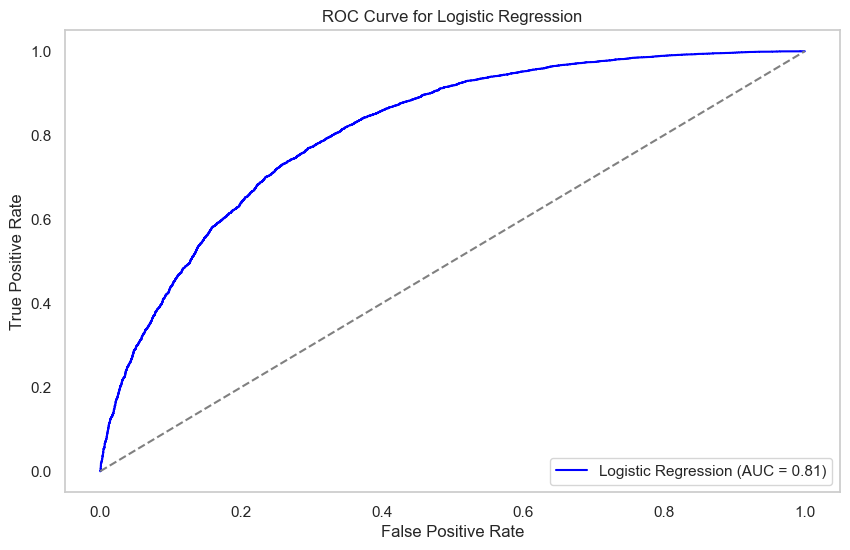

In [4]:
##### Loistic Regression with Threshold, feature engineering and best paramtres ###########


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset
file_path = 'diabetes_data new.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Feature Engineering
def create_features(data):
    """Create additional features"""
    data['BMI_Age'] = data['BMI'] * data['Age']
    data['Health_Score'] = data['GenHlth'] * data['PhysHlth'] * data['MentHlth']
    data['Lifestyle_Score'] = (
        data['PhysActivity'] + data['Fruits'] + data['Veggies'] - data['HvyAlcoholConsump']
    )
    data['Risk_Score'] = (
        data['HighBP'] + data['HighChol'] + data['Smoker'] + data['HeartDiseaseorAttack'] + data['Stroke']
    )
    return data

# Apply feature engineering
data = create_features(data)

# Preprocessing
X = data.drop(columns=['Diabetes'])  # Replace 'Diabetes' with your target column
y = data['Diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga'],    # Solvers supporting l1 or l2
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate with threshold 0.5
y_pred = best_log_reg.predict(X_test_scaled)
y_probs = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [673]:
### EXPLORING WITH CHI SQUARE #####
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Apply Chi-Square feature selection
# Select top 5 features using Chi-Square test
chi2_selector = SelectKBest(chi2, k=5)
X_selected = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features Using Chi-Square Test:", selected_features.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with selected features
final_model = LogisticRegression(random_state=42, max_iter=1000)
final_model.fit(X_train_scaled, y_train_smote)

# Predict on the test data
y_pred = final_model.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Selected Features Using Chi-Square Test: ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

Confusion Matrix:
[[4271 1784]
 [1818 4931]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6055
           1       0.73      0.73      0.73      6749

    accuracy                           0.72     12804
   macro avg       0.72      0.72      0.72     12804
weighted avg       0.72      0.72      0.72     12804


Accuracy Score: 0.7186816619806311


In [675]:
###### DECISION TREE AND RANDOM FOREST WITH SCALING #######

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k=5)
X_selected = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features Using Chi-Square Test:", selected_features.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features (optional for tree-based methods, included for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Decision Tree Classifier
print("\n--- Decision Tree Classifier ---")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train_smote)
y_pred_dt = decision_tree.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

# Train and evaluate Random Forest Classifier
print("\n--- Random Forest Classifier ---")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_scaled, y_train_smote)
y_pred_rf = random_forest.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))


Selected Features Using Chi-Square Test: ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

--- Decision Tree Classifier ---
Confusion Matrix:
[[4097 1958]
 [2393 4356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      6055
           1       0.69      0.65      0.67      6749

    accuracy                           0.66     12804
   macro avg       0.66      0.66      0.66     12804
weighted avg       0.66      0.66      0.66     12804


Accuracy Score: 0.6601843174008123

--- Random Forest Classifier ---
Confusion Matrix:
[[4049 2006]
 [1977 4772]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6055
           1       0.70      0.71      0.71      6749

    accuracy                           0.69     12804
   macro avg       0.69      0.69      0.69     12804
weighted avg       0.69      0.69      0.69     12804


Accuracy Sco

In [677]:
##### DECISION TREE AND RANDOM FORST WITHOUT SCALING #####

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'target' with your actual target column name
y = data['Diabetes']                # Replace 'target' with your actual target column name

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k=5)
X_selected = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features Using Chi-Square Test:", selected_features.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Train and evaluate Decision Tree Classifier
print("\n--- Decision Tree Classifier ---")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train_smote)
y_pred_dt = decision_tree.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

# Train and evaluate Random Forest Classifier
print("\n--- Random Forest Classifier ---")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_scaled, y_train_smote)
y_pred_rf = random_forest.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))


Selected Features Using Chi-Square Test: ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

--- Decision Tree Classifier ---
Confusion Matrix:
[[4097 1958]
 [2393 4356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      6055
           1       0.69      0.65      0.67      6749

    accuracy                           0.66     12804
   macro avg       0.66      0.66      0.66     12804
weighted avg       0.66      0.66      0.66     12804


Accuracy Score: 0.6601843174008123

--- Random Forest Classifier ---
Confusion Matrix:
[[4049 2006]
 [1977 4772]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6055
           1       0.70      0.71      0.71      6749

    accuracy                           0.69     12804
   macro avg       0.69      0.69      0.69     12804
weighted avg       0.69      0.69      0.69     12804


Accuracy Sco

In [679]:
#### ADJUSTING MAX DEPTH AND LEAF ####
# Re-initialize Decision Tree and Random Forest with max_depth and min_samples_leaf
decision_tree_with_depth = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)
random_forest_with_depth = RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

# Train the models
decision_tree_with_depth.fit(X_train_scaled, y_train_smote)
random_forest_with_depth.fit(X_train_scaled, y_train_smote)

# Make predictions
dt_depth_predictions = decision_tree_with_depth.predict(X_test_scaled)
rf_depth_predictions = random_forest_with_depth.predict(X_test_scaled)

# Evaluate the models
dt_depth_accuracy = accuracy_score(y_test, dt_depth_predictions)
rf_depth_accuracy = accuracy_score(y_test, rf_depth_predictions)

# Detailed classification report
dt_depth_report = classification_report(y_test, dt_depth_predictions)
rf_depth_report = classification_report(y_test, rf_depth_predictions)

# Output the evaluation metrics
print("Decision Tree Accuracy with Depth Constraints:", dt_depth_accuracy)
print("\nDecision Tree Classification Report:\n", dt_depth_report)

print("\nRandom Forest Accuracy with Depth Constraints:", rf_depth_accuracy)
print("\nRandom Forest Classification Report:\n", rf_depth_report)


Decision Tree Accuracy with Depth Constraints: 0.7161824429865667

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68      6055
           1       0.70      0.80      0.75      6749

    accuracy                           0.72     12804
   macro avg       0.72      0.71      0.71     12804
weighted avg       0.72      0.72      0.71     12804


Random Forest Accuracy with Depth Constraints: 0.7234457981880662

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      6055
           1       0.73      0.76      0.74      6749

    accuracy                           0.72     12804
   macro avg       0.72      0.72      0.72     12804
weighted avg       0.72      0.72      0.72     12804



In [689]:
# Re-initialize Decision Tree and Random Forest with max_depth and min_samples_leaf
decision_tree_with_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
random_forest_with_depth5 = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

# Train the models
decision_tree_with_depth.fit(X_train_scaled, y_train_smote)
random_forest_with_depth.fit(X_train_scaled, y_train_smote)

# Make predictions
dt_depth_predictions = decision_tree_with_depth.predict(X_test_scaled)
rf_depth_predictions = random_forest_with_depth.predict(X_test_scaled)

# Evaluate the models
dt_depth_accuracy = accuracy_score(y_test, dt_depth_predictions)
rf_depth_accuracy = accuracy_score(y_test, rf_depth_predictions)

# Detailed classification report
dt_depth_report = classification_report(y_test, dt_depth_predictions)
rf_depth_report = classification_report(y_test, rf_depth_predictions)

# Output the evaluation metrics
print("Decision Tree Accuracy with Depth Constraints:", dt_depth_accuracy)
print("\nDecision Tree Classification Report:\n", dt_depth_report)

print("\nRandom Forest Accuracy with Depth Constraints:", rf_depth_accuracy)
print("\nRandom Forest Classification Report:\n", rf_depth_report)


Decision Tree Accuracy with Depth Constraints: 0.7161824429865667

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68      6055
           1       0.70      0.80      0.75      6749

    accuracy                           0.72     12804
   macro avg       0.72      0.71      0.71     12804
weighted avg       0.72      0.72      0.71     12804


Random Forest Accuracy with Depth Constraints: 0.7234457981880662

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      6055
           1       0.73      0.76      0.74      6749

    accuracy                           0.72     12804
   macro avg       0.72      0.72      0.72     12804
weighted avg       0.72      0.72      0.72     12804



In [691]:
#### PARAMTRE TUNING #######
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize models and parameters
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

params = {
    'random_forest': {
        'n_estimators': [200, 300],
        'max_depth': [15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': ['balanced']
    },
    'gradient_boosting': {
        'n_estimators': [200, 300],
        'max_depth': [5, 7],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 0.9]
    },
    'xgboost': {
        'n_estimators': [200, 300],
        'max_depth': [5, 7],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]
    }
}

# Perform grid search for each model
best_models = {}
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=params[model_name],
        scoring='accuracy',
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    grid.fit(X_train_scaled, y_train_smote)
    
    # Save the best model
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid.best_score_}")

# Evaluate the best models on the test set
for model_name, best_model in best_models.items():
    print(f"\nEvaluating {model_name} on the test set...")
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n{report}")



Tuning hyperparameters for random_forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for random_forest: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated score for random_forest: 0.7062741566287665

Tuning hyperparameters for gradient_boosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for gradient_boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated score for gradient_boosting: 0.7173627528237457

Tuning hyperparameters for xgboost...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\Fatima\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for xgboost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated score for xgboost: 0.7169124545011071

Evaluating random_forest on the test set...
Accuracy for random_forest: 0.7122774133083412
Classification Report for random_forest:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      6055
           1       0.72      0.75      0.73      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.71      0.71     12804
weighted avg       0.71      0.71      0.71     12804


Evaluating gradient_boosting on the test set...
Accuracy for gradient_boosting: 0.721571383942518
Classification Report for gradient_boosting:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      6055
           1       0.72      0.76      0.74      6749

    accuracy                           0

Dataset loaded successfully!


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


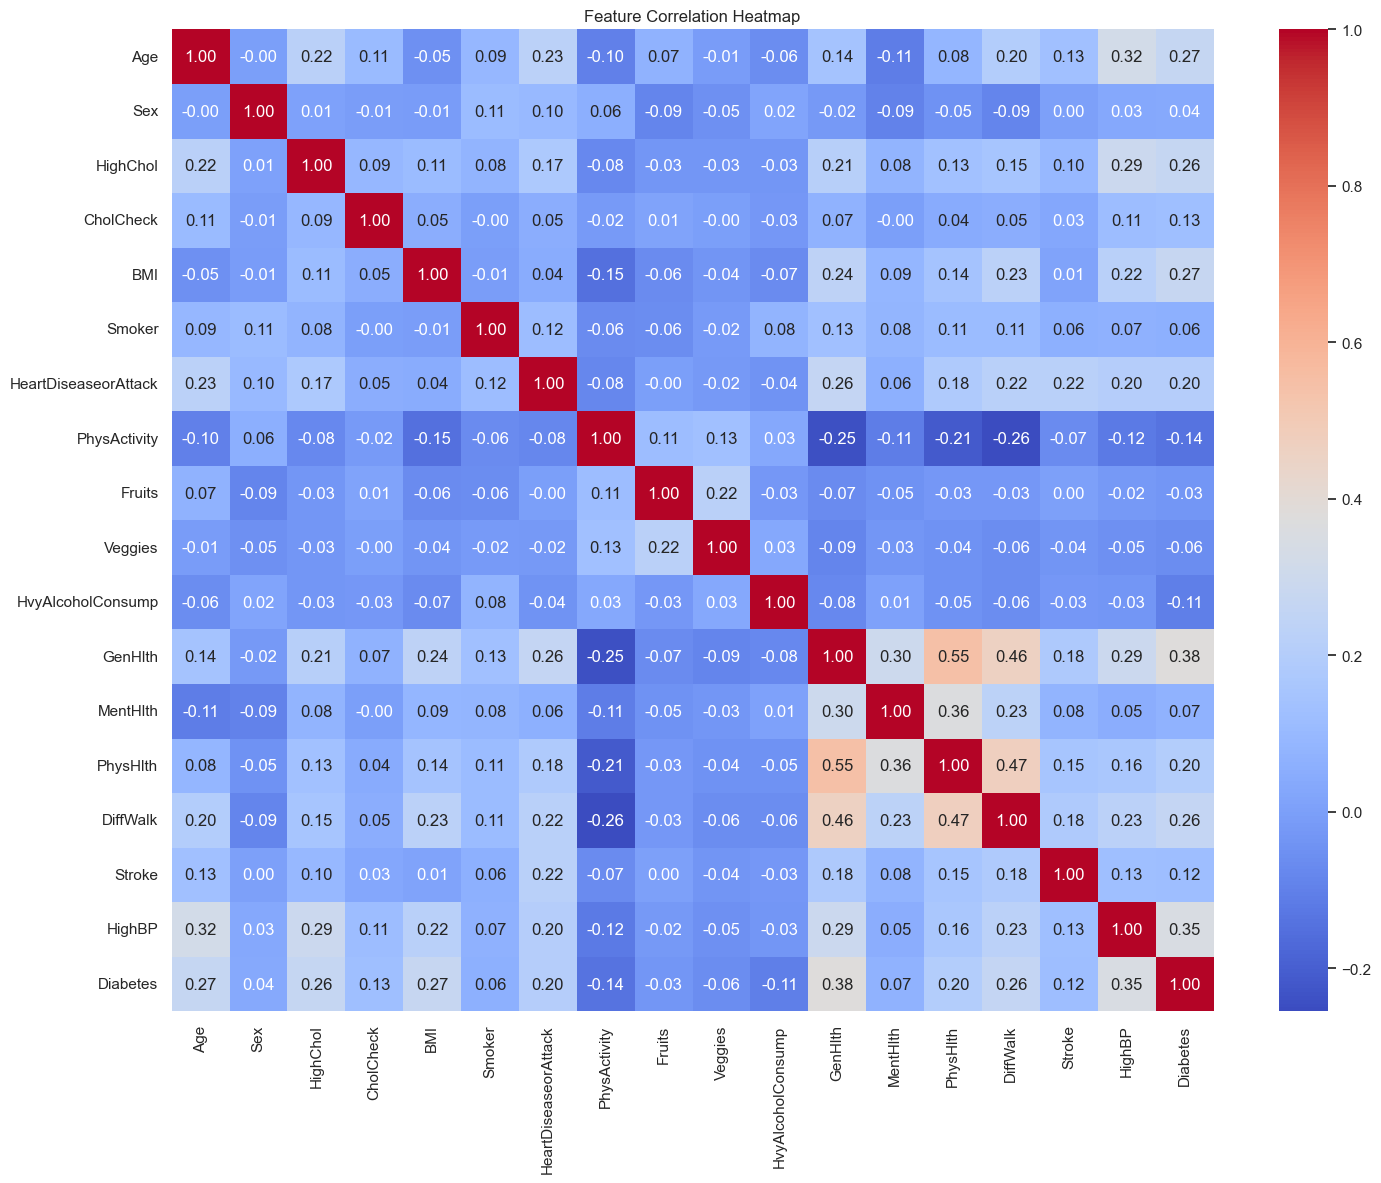

C:\Users\Fatima\AppData\Local\Temp\ipykernel_35836\2046582082.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes', data=data, palette='viridis')


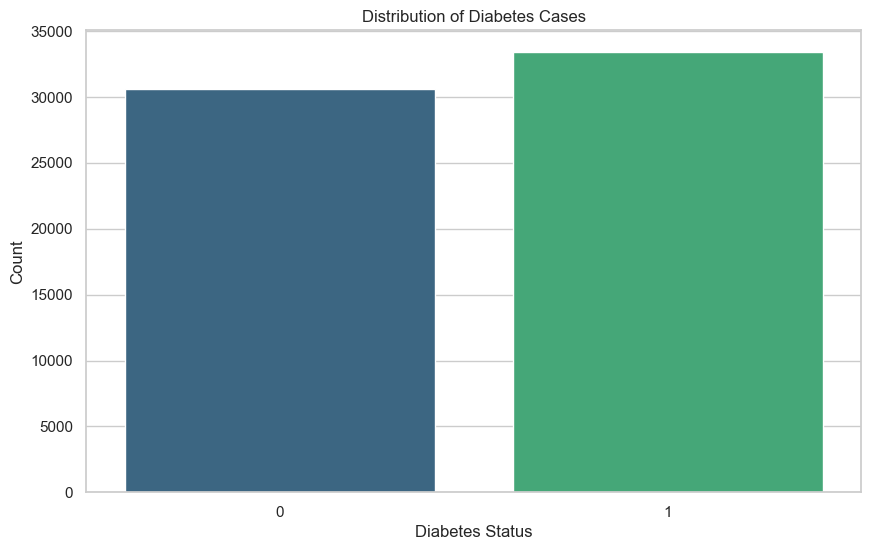

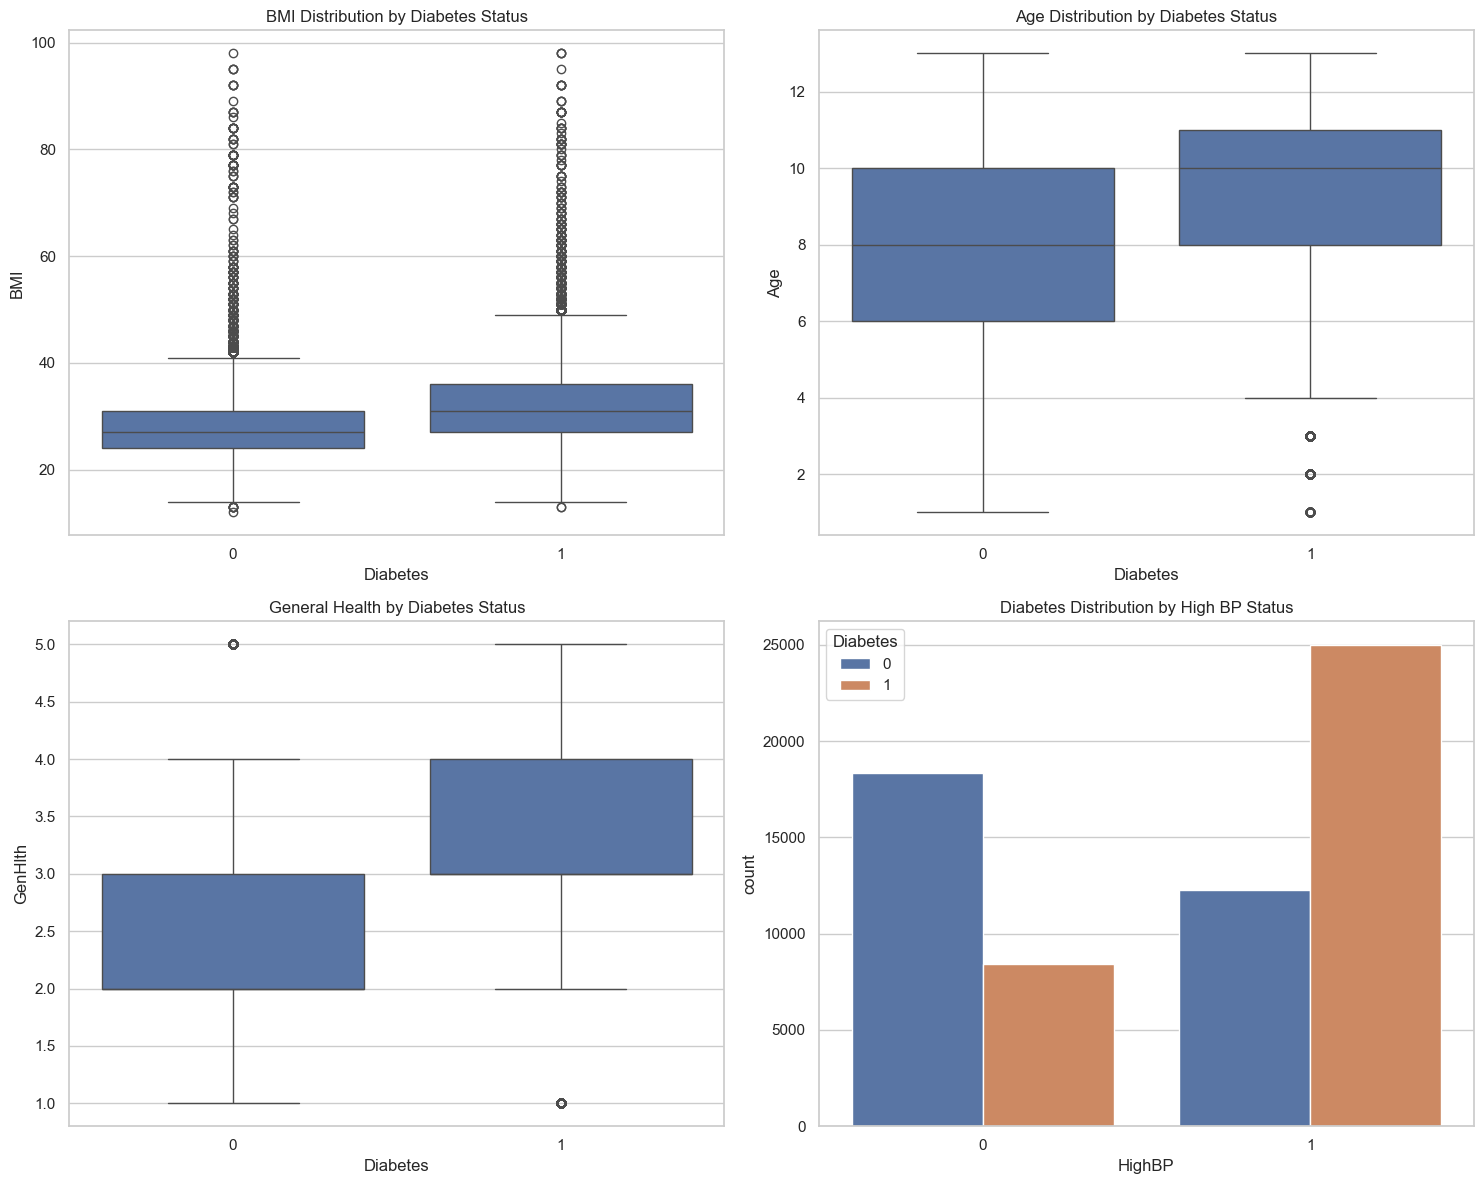


Key Data Insights:
Total samples: 64020
Diabetes cases: 33398
Non-diabetes cases: 30622

Top 5 Correlations with Diabetes:
Diabetes    1.000000
GenHlth     0.379334
HighBP      0.351481
BMI         0.272951
Age         0.268049
Name: Diabetes, dtype: float64

RANDOM_FOREST Results:
Best parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.7350
Precision: 0.7347
Recall: 0.7783
F1 Score: 0.7559
ROC AUC: 0.8079

GRADIENT_BOOSTING Results:
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.7413
Precision: 0.7391
Recall: 0.7871
F1 Score: 0.7623
ROC AUC: 0.8149

XGBOOST Results:
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.7420
Precision: 0.7409
Recall: 0.7850
F1 Score: 0.7623
ROC AUC: 0.8155


In [2]:
### Tuning paramtres  and using fetaure engineering  #######
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Enable inline plotting for Jupyter
%matplotlib inline

def read_data(file_path):
    """Read the dataset from the specified file path"""
    data = pd.read_csv('diabetes_data new.csv')
    print("Dataset loaded successfully!")
    display(data.head())
    return data

def perform_eda(data):
    """Perform Exploratory Data Analysis"""
    sns.set_theme(style="whitegrid")

    # Correlation Heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
# Target Variable Distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Diabetes', data=data, palette='viridis')
    plt.title('Distribution of Diabetes Cases')
    plt.xlabel('Diabetes Status')
    plt.ylabel('Count')
    plt.show()

    # Multiple Feature Analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    sns.boxplot(x='Diabetes', y='BMI', data=data, ax=axes[0,0])
    axes[0,0].set_title('BMI Distribution by Diabetes Status')

    sns.boxplot(x='Diabetes', y='Age', data=data, ax=axes[0,1])
    axes[0,1].set_title('Age Distribution by Diabetes Status')

    sns.boxplot(x='Diabetes', y='GenHlth', data=data, ax=axes[1,0])
    axes[1,0].set_title('General Health by Diabetes Status')

    sns.countplot(x='HighBP', hue='Diabetes', data=data, ax=axes[1,1])
    axes[1,1].set_title('Diabetes Distribution by High BP Status')

    plt.tight_layout()
    plt.show()

    # Print insights
    print("\nKey Data Insights:")
    print(f"Total samples: {len(data)}")
    print(f"Diabetes cases: {sum(data['Diabetes'] == 1)}")
    print(f"Non-diabetes cases: {sum(data['Diabetes'] == 0)}")
    print(f"\nTop 5 Correlations with Diabetes:")
    print(data.corr()['Diabetes'].sort_values(ascending=False)[:5])

def preprocess_data(data):
    """Preprocess the data"""
    data = data.drop_duplicates()
    data = data.fillna(data.median())
    data = data.apply(pd.to_numeric, errors='coerce')
    return data.dropna()

def create_features(data):
    """Create additional features"""
    data['BMI_Age'] = data['BMI'] * data['Age']
    data['Health_Score'] = data['GenHlth'] * data['PhysHlth'] * data['MentHlth']
    data['Lifestyle_Score'] = data['PhysActivity'] + data['Fruits'] + data['Veggies'] - data['HvyAlcoholConsump']
    data['Risk_Score'] = data['HighBP'] + data['HighChol'] + data['Smoker'] + data['HeartDiseaseorAttack'] + data['Stroke']
    return data

def build_model(data):
    """Build and evaluate models"""
    # Perform EDA
    perform_eda(data)

    # Preprocess
    data = preprocess_data(data)
    data = create_features(data)

    # Split features and target
    X = data.drop(columns=["Diabetes"])
    y = data["Diabetes"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize models and parameters
    models = {
        'random_forest': RandomForestClassifier(random_state=42),
        'gradient_boosting': GradientBoostingClassifier(random_state=42),
        'xgboost': XGBClassifier(random_state=42)
    }

    params = {
        'random_forest': {
            'n_estimators': [200, 300],
            'max_depth': [15, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'class_weight': ['balanced']
        },
        'gradient_boosting': {
            'n_estimators': [200, 300],
            'max_depth': [5, 7],
            'learning_rate': [0.05, 0.1],
            'subsample': [0.8, 0.9]
        },
        'xgboost': {
            'n_estimators': [200, 300],
            'max_depth': [5, 7],
            'learning_rate': [0.05, 0.1],
            'subsample': [0.8, 0.9],
            'colsample_bytree': [0.8, 0.9]
        }
    }

    best_model = None
    best_accuracy = 0

# Train and evaluate models
    for name, model in models.items():
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_balanced, y_train_balanced)

        y_pred = grid_search.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = grid_search.best_estimator_

        print(f"\n{name.upper()} Results:")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
        print(f"ROC AUC: {roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1]):.4f}")

    return best_model, scaler

# Run the process
data = read_data('diabetes_data new.csv')  # Replace with your dataset's file path
best_model, scaler = build_model(data)



In [605]:
### OPTIMIZING WITH DIFFERENT FEATURE SELECTION METHOD ####

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['Diabetes'])  # Replace 'Diabetes' with your actual target column name
y = data['Diabetes']                # Replace 'Diabetes' with your actual target column name

# Apply Mutual Information feature selection
mutual_info_selector = SelectKBest(mutual_info_classif, k=5)
X_selected = mutual_info_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[mutual_info_selector.get_support()]
print("Selected Features Using Mutual Information:", selected_features.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate Decision Tree Classifier
print("\n--- Decision Tree Classifier ---")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)
y_pred_dt = decision_tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

# Train and evaluate Random Forest Classifier
print("\n--- Random Forest Classifier ---")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
# Re-initialize Decision Tree and Random Forest with max_depth and min_samples_leaf
decision_tree_with_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
random_forest_with_depth5 = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

# Train the models
decision_tree_with_depth.fit(X_train_scaled, y_train_smote)
random_forest_with_depth.fit(X_train_scaled, y_train_smote)

# Make predictions
dt_depth_predictions = decision_tree_with_depth.predict(X_test_scaled)
rf_depth_predictions = random_forest_with_depth.predict(X_test_scaled)

# Evaluate the models
dt_depth_accuracy = accuracy_score(y_test, dt_depth_predictions)
rf_depth_accuracy = accuracy_score(y_test, rf_depth_predictions)

# Detailed classification report
dt_depth_report = classification_report(y_test, dt_depth_predictions)
rf_depth_report = classification_report(y_test, rf_depth_predictions)

# Output the evaluation metrics
print("Decision Tree Accuracy with Depth Constraints:", dt_depth_accuracy)
print("\nDecision Tree Classification Report:\n", dt_depth_report)

print("\nRandom Forest Accuracy with Depth Constraints:", rf_depth_accuracy)
print("\nRandom Forest Classification Report:\n", rf_depth_report)


Selected Features Using Mutual Information: ['Age', 'HighChol', 'BMI', 'GenHlth', 'HighBP']

--- Decision Tree Classifier ---
Confusion Matrix:
[[4199 1856]
 [1852 4897]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6055
           1       0.73      0.73      0.73      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.71      0.71     12804
weighted avg       0.71      0.71      0.71     12804


Accuracy Score: 0.7104029990627929

--- Random Forest Classifier ---
Confusion Matrix:
[[4094 1961]
 [1734 5015]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6055
           1       0.72      0.74      0.73      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.71      0.71     12804
weighted avg       0.71      0.71      0.71     12804


Accuracy Sc

In [601]:
#### OPTIMIZING WITH RFE FEATURE SELECTION ####
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Define the model for RFE
rfe_estimator = DecisionTreeClassifier(random_state=42)
rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=5)
X_selected = rfe_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[rfe_selector.support_]
print("Selected Features Using RFE:", selected_features.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE and follow the same process for training and evaluation
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate Decision Tree Classifier
print("\n--- Decision Tree Classifier ---")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)
y_pred_dt = decision_tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

# Train and evaluate Random Forest Classifier
print("\n--- Random Forest Classifier ---")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
# Re-initialize Decision Tree and Random Forest with max_depth and min_samples_leaf
decision_tree_with_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
random_forest_with_depth5 = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

# Train the models
decision_tree_with_depth.fit(X_train_scaled, y_train_smote)
random_forest_with_depth.fit(X_train_scaled, y_train_smote)

# Make predictions
dt_depth_predictions = decision_tree_with_depth.predict(X_test_scaled)
rf_depth_predictions = random_forest_with_depth.predict(X_test_scaled)
# Evaluate the models
dt_depth_accuracy = accuracy_score(y_test, dt_depth_predictions)
rf_depth_accuracy = accuracy_score(y_test, rf_depth_predictions)

# Detailed classification report
dt_depth_report = classification_report(y_test, dt_depth_predictions)
rf_depth_report = classification_report(y_test, rf_depth_predictions)

# Output the evaluation metrics
print("Decision Tree Accuracy with Depth Constraints:", dt_depth_accuracy)
print("\nDecision Tree Classification Report:\n", dt_depth_report)

print("\nRandom Forest Accuracy with Depth Constraints:", rf_depth_accuracy)
print("\nRandom Forest Classification Report:\n", rf_depth_report)


Selected Features Using RFE: ['Age', 'BMI', 'GenHlth', 'PhysHlth', 'HighBP']

--- Decision Tree Classifier ---
Confusion Matrix:
[[4208 1847]
 [2233 4516]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      6055
           1       0.71      0.67      0.69      6749

    accuracy                           0.68     12804
   macro avg       0.68      0.68      0.68     12804
weighted avg       0.68      0.68      0.68     12804


Accuracy Score: 0.6813495782567948

--- Random Forest Classifier ---
Confusion Matrix:
[[4085 1970]
 [1880 4869]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      6055
           1       0.71      0.72      0.72      6749

    accuracy                           0.70     12804
   macro avg       0.70      0.70      0.70     12804
weighted avg       0.70      0.70      0.70     12804


Accuracy Score: 0.69931271

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Confusion Matrix:
[[4061 1994]
 [1770 4979]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      6055
           1       0.71      0.74      0.73      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.70      0.70     12804
weighted avg       0.71      0.71      0.71     12804

Accuracy Score: 0.7060
ROC AUC Score: 0.7691


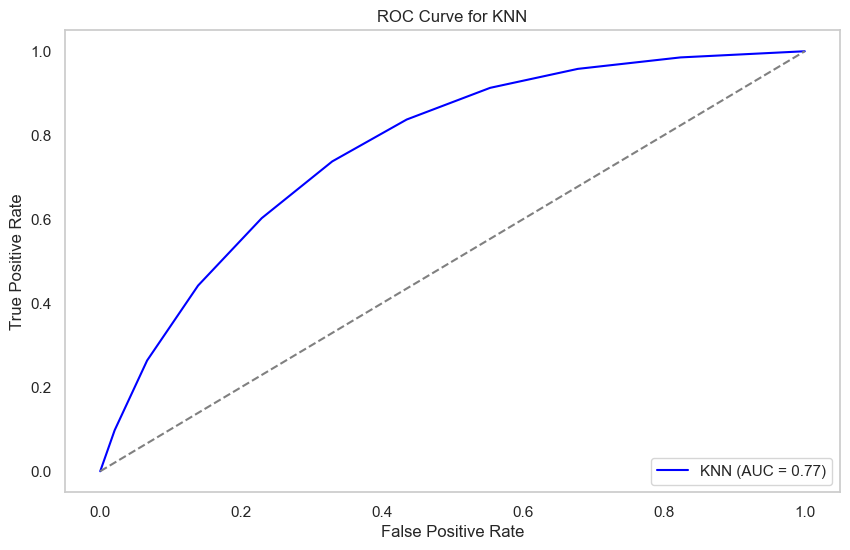

In [612]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = 'diabetes_data new.csv'
data = pd.read_csv(file_path)

# Feature and target variables
X = data.drop(columns=["Diabetes"])  # Replace 'Diabetes' with your target column name
y = data["Diabetes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (KNN is sensitive to scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],           # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function
    'metric': ['euclidean', 'manhattan']   # Distance metric
}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model and parameters
best_knn = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, best_knn.predict_proba(X_test_scaled)[:, 1]):.4f}")

# Plot ROC Curve
y_probs = best_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc_score(y_test, y_probs):.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [614]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Continue with train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Proceed with KNN training as before
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

best_knn = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Selected Features: Index(['Age', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'HighBP'],
      dtype='object')
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Confusion Matrix:
[[4097 1958]
 [1711 5038]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      6055
           1       0.72      0.75      0.73      6749

    accuracy                           0.71     12804
   macro avg       0.71      0.71      0.71     12804
weighted avg       0.71      0.71      0.71     12804

Accuracy Score: 0.7134
